In [1]:

import json
import matplotlib.pyplot as plt
from datetime import date, datetime

In [2]:
def calc_age(birthdate, at_date):
    age = at_date.year - birthdate.year - ((at_date.month, at_date.day) < (birthdate.month, birthdate.day))
    return age

In [3]:
file = open('dutch-house-of-representatives.json')
members = json.load(file)
file.close()

In [4]:
years = range(1850, 2022)
members_at_year = dict()
    
for year in years:
    for m in members:
        current_date = datetime(year, 1, 1)
        start_date = datetime.strptime(m["start"], '%Y-%m-%dT%H:%M:%SZ')
        if "end" in m:
            end_date = datetime.strptime(m["end"], '%Y-%m-%dT%H:%M:%SZ')
        else:
            # fallback end date, assume member will be out of office after 4 years
            today = datetime.today()
            end_date = datetime(today.year + 4, today.month, today.day)
        
        if start_date <= current_date <= end_date:
            date_of_birth = datetime.strptime(m["dob"], '%Y-%m-%dT%H:%M:%SZ')
            age = calc_age(date_of_birth, current_date)
            
            if year in members_at_year:
                members_at_year[year].append(age)
            else:
                members_at_year[year] = [age] 
                

percentages=[]

def isPensioner(age):
  if age > 65:
    return True
  else:
    return False

for year, members in members_at_year.items():
    total_members = len(members)
    number_of_pensioners = len(list(filter(isPensioner, members)))
    percentages.append(round(number_of_pensioners / total_members * 100))

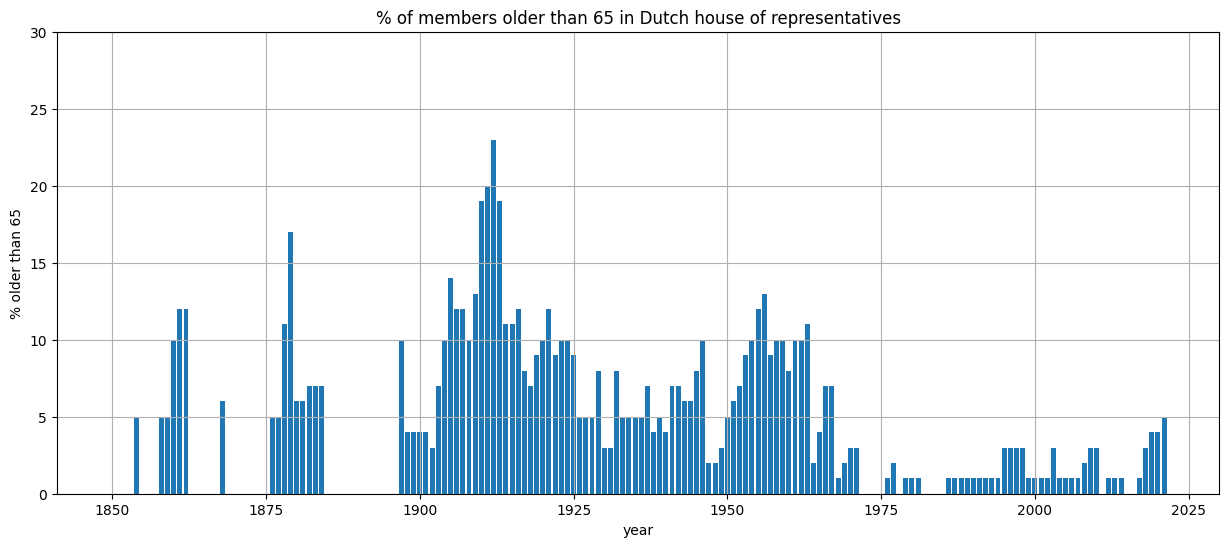

In [5]:
plt.subplots(figsize=(15, 6))
plt.bar(years, percentages)
plt.ylim(0, 30)
plt.grid()
plt.title("% of members older than 65 in Dutch house of representatives")
plt.ylabel("% older than 65")
plt.xlabel("year")
plt.show()
